<div class="alert alert-info">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Привет. Меня зовут Алина Гусева, я буду делать ревью к твоей работе по исследовательскому анализу данных. В дальнейшем предлагаю общаться на "ты".
    
Видно, что ты старалась, делая проект. Все ключевые этапы проекта выполнены, в целом тебе удалось со всем справиться. Особенно хочется отметить, что соблюдена структура проекта, а код написан аккуратно.
    
Для того, чтобы и тебе и мне удобнее бы
    ло ориентироваться в комментариях, я буду помечать их разными цветами:
- красный цвет означает комментарии, которые требуют доработки. Как только ты их исправишь - проект будет принят;
- желтый цвет - то, что в следующий раз можно будет сделать по-другому. На твое усмотрение можешь доделать маленькие правки сейчас или учесть замечание для выполнения следующих проектов;
- зеленый цвет - очень элегантные и удачные решение, которые желательно использовать в дальнейшей работе.
- синий цвет - информация
    
Предлагаю работать над проектом в диалоге: если ты что-то изменяешь или вносишь какие-то коррективы - выделяй это каким-нибудь цветом и пиши об этом мне. Так мне гораздо легче будет отследить сделанные изменения.
    
Также попрошу тебя не изменять и не удалять мои комментарии, чтобы проверка твоего самостоятельного проекта прошла оперативнее.
    
 
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

import matplotlib.pyplot as plt

pd.options.display.max_columns = 40

import warnings
warnings.filterwarnings('ignore')

display(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

None

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Имеем данные из 22 столбцов, на первый взгляд нет бросающихся в глаза "неадекватных" значений. Множество столбцов имеют пропуски, некоторые из них носят ценный характер для изучения.

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Хороший тон использовать методы info() и describe() для получения общей информации из таблицы, молодец)
    
 
</div>

### Шаг 2. Предобработка данных

In [2]:

#заполняем пропуски в балконах на нули, исходя из предположения, что пропущенное значение = отуствие балкона
data['balcony'] = data['balcony'].fillna(value=0)

In [3]:
#запоняем другие пропуски медианой

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['floor'] = data['floor'].fillna(data['floor'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].median())
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())
data['ponds_around3000'] = data['ponds_around3000'].fillna(data['ponds_around3000'].median())
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())


<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
В целом, да, все верно. Единственное, ты сейчас выполняешь однотипное действие, будет гораздо удобнее, если ты напишешь функцию и применишь к необходимым столбцам. Код будет гораздо более читаемым.
    
Столбцы с расстоянием до парка и аэропорта заполняются автоматически, так что их можно было оставить как есть. А вот для более точной замены в столбце высота потолка можно было предварительно сгруппировать данные, например, по этажности дома, а затем заменять медианным значением относительно этих групп. Это идея для размышления)
    
 
</div>

In [4]:
#избавляемся от семи пропусков в названии населенного пункта
data.dropna(subset=['locality_name'], inplace=True)

In [5]:
#заполняем пропуски в площади кухни и жилой зоны в зависимости от их отношения к общей площади
liv_tot_median = (data['living_area'] / data['total_area']).median()
kit_tot_median = (data['kitchen_area'] / data['total_area']).median()
data.loc[data['living_area'].isna(),'living_area'] = liv_tot_median*data['total_area']
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = kit_tot_median*data['total_area']

In [6]:
#переводим к формату даты и заполняем пропуски в days_exposition, исходя из разницы максимальногой даты
#и первой даты публикации, так как пропуски означают, скорее всего, что публикация еще активна

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

maxfirstday = data['first_day_exposition'].max()

data.loc[data['days_exposition'].isna(), 
         'days_exposition'] = (maxfirstday - data.loc[data['days_exposition'].isna(), 'first_day_exposition']).dt.days

In [7]:

#меняем тип данных и маленько освобождаем память

data['is_apartment'] = data['is_apartment'].astype('bool') #здесь только два возможных варианта
data['open_plan'] = data['open_plan'].astype('bool') #здесь только два возможных варианта
data['studio'] = data['studio'].astype('bool') #здесь только два возможных варианта
data['rooms'] = data['rooms'].astype('int') #имеет смысл работать с целыми числами
data['floor'] = data['floor'].astype('int') #имеет смысл работать с целыми числами
data['floors_total'] = data['floors_total'].astype('int') #имеет смысл работать с целыми числами
data['balcony'] = data['balcony'].astype('int') #имеет смысл работать с целыми числами
data['rooms'] = data['rooms'].apply(pd.to_numeric,downcast='unsigned')
data['floor'] = data['floor'].apply(pd.to_numeric,downcast='unsigned')
data['balcony'] = data['balcony'].apply(pd.to_numeric,downcast='unsigned')


<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Отлично, все стобцы теперь имеют корректный тип данных.
    
 
</div>

### Шаг 3. Посчитайте и добавьте в таблицу

In [8]:
#посчитать и добавить в таблицу цену квадратного метра
data['price_for_meter'] = data['last_price'] / data['total_area']

#посчитать и добавить столбцы с годом, днем и месяцем публикации объявления
data['day_expo'] = data['first_day_exposition'].dt.weekday

#создаем словарь для дней недели и меняем цифры на названия
dict_weekday = {
    0:'понедельник', 1:'вторник', 2:'среда', 3:'четверг', 4:'пятница', 5:'суббота', 6:'воскресенье'
}
data['day_expo'] = data['day_expo'].map(dict_weekday)
data['month_expo'] = pd.DatetimeIndex(data['first_day_exposition']).month 
data['year_expo'] = pd.DatetimeIndex(data['first_day_exposition']).year

#этаж квартиры; варианты — первый, последний, другой
def floor_category(row):
    floor=row['floor']
    floors_total=row['floors_total']
    if floor==1:
        return 'первый'
    if floor==floors_total:
        return 'последний'
    return 'другой'
data['floor_category'] = data.apply(floor_category, axis=1)

#соотношение жилой и общей площади, а также отношение площади кухни к общей
data['living_to_total'] = data['living_area'] / data['total_area']
data['kitchen_to_total'] = data['kitchen_area'] / data['total_area']


<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Молодец, что пишешь функции и пользуешься встроенными методами модуля datetime, так код становится более структурированный.
    
 
</div>

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Площадь, цена, число комнат, высота потолков

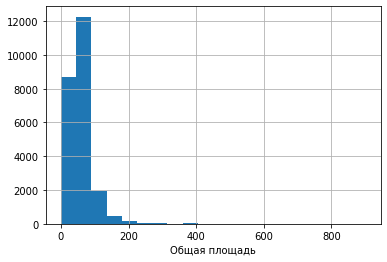

,total_area
count,23650.00
mean,60.33
std,35.66
min,12.00
25%,40.00
50%,52.00
75%,69.70
max,900.00


In [9]:
fig, ax = plt.subplots()
data['total_area'].hist(bins=20, range=(0,900))
ax.set_xlabel('Общая площадь')
plt.show()

data[['total_area']].describe().style.format('{:.2f}')

<div class="alert alert-warning">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Для большей наглядности советую тебе подписывать оси и названия графиков
    
 
</div>

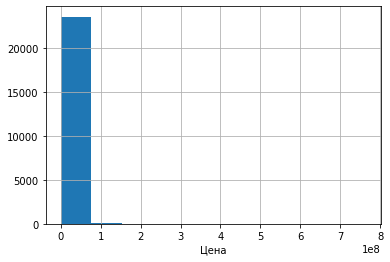

,last_price
count,23650.00
mean,6541126.90
std,10896399.18
min,12190.00
25%,3400000.00
50%,4650000.00
75%,6799000.00
max,763000000.00


In [10]:
fig, ax = plt.subplots()
data['last_price'].hist()
ax.set_xlabel('Цена')
plt.show()

data[['last_price']].describe().style.format('{:.2f}')

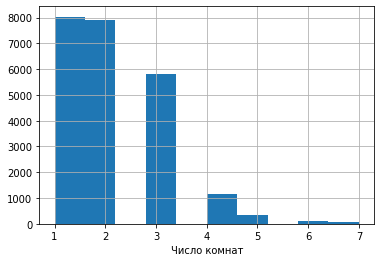

,rooms
count,23650.00
mean,2.07
std,1.08
min,0.00
25%,1.00
50%,2.00
75%,3.00
max,19.00


In [11]:
fig, ax = plt.subplots()
data['rooms'].hist(range=(1,7))
ax.set_xlabel('Число комнат')
plt.show()

data[['rooms']].describe().style.format('{:.2f}')

**Больше всего двухкомнатных квартир, что вроде бы нормально**

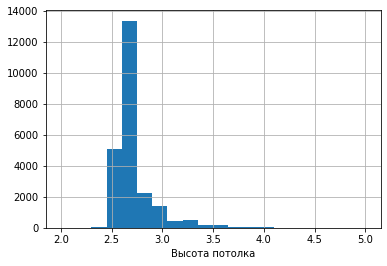

,ceiling_height
count,23650.00
mean,2.72
std,0.99
min,1.00
25%,2.60
50%,2.65
75%,2.70
max,100.00


In [12]:
fig, ax = plt.subplots()
data['ceiling_height'].hist(bins=20, range=(2,5))
ax.set_xlabel('Высота потолка')
plt.show()

data[['ceiling_height']].describe().style.format('{:.2f}')

**Пока вполне предсказуемая ситуация - стандартная высота**

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Медианное значение вписывается в стандарты ГОСТа, но встречаются и некорректные значения.
 
</div>

#### Изучение времени продажи квартиры

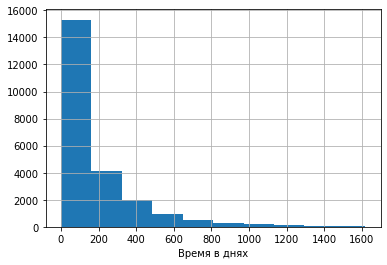

,days_exposition
count,23650.00
mean,185.71
std,233.46
min,0.00
25%,43.00
50%,94.00
75%,237.00
max,1618.00


In [13]:
fig, ax = plt.subplots()
data['days_exposition'].hist()
ax.set_xlabel('Время в днях')
plt.show()

data[['days_exposition']].describe().style.format('{:.2f}')

**Обычно, продажи занимают около 94 дней. Исходя из разделения на квартили, можно считать, что до 25% - это быстрые продажи - до 43 дней, а слишком долгие - после 75% - более 237 дней**

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Да, верно! Среднее время продажи квартиры --- 2-3 месяца. Быстрыми продажами можно считать квартиры, которые продавались в течение месяца.
 
</div>

#### Редкие значения

- Высота потолка едва ли может быть равной 1м. Уберем всё, что ниже 2,4.
- Площадь более 200м2 также уберем.
- Цена более 400млн (1 квартира за ~700 всё портит, хотя кто эти ваши столицы знает).
- Число комнат более 5 тоже открыжим. 

In [14]:
clean_data = data.query('ceiling_height > 2.4 and total_area < 200 and rooms <=5 and last_price < 400000000')
clean_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,month_expo,year_expo,living_to_total,kitchen_to_total
count,23289.000000,2.328900e+04,23289.000000,23289.000000,23289.000000,23289.000000,23289.000000,23289.000000,23289.000000,23289.000000,23289.000000,23289.000000,23289.000000,23289.000000,23289.000000,23289.00000,23289.000000,2.328900e+04,23289.000000,23289.000000,23289.000000,23289.000000
mean,9.840311,5.984255e+06,57.794056,2.017734,2.719984,10.735326,33.004724,5.914294,10.243551,0.594873,28355.062132,14036.954421,0.459316,467.635794,0.816909,509.07978,184.055219,9.844125e+04,6.403624,2017.372794,0.564182,0.190707
std,5.663603,6.181926e+06,25.795362,0.960167,0.993626,6.595383,16.668014,4.898054,5.104650,0.960859,11140.197243,7521.906766,0.738175,200.651173,0.821790,171.47802,231.685580,4.566486e+04,3.491057,1.036093,0.100578,0.075355
min,0.000000,1.219000e+04,12.000000,0.000000,2.450000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.00000,0.000000,1.118349e+02,1.000000,2014.000000,0.021583,0.043524
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.300000,0.000000,21091.000000,11086.000000,0.000000,455.000000,0.000000,502.00000,43.000000,7.653061e+04,3.000000,2017.000000,0.500000,0.134921
50%,9.000000,4.600000e+06,51.500000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.00000,93.000000,9.487805e+04,6.000000,2017.000000,0.567860,0.175000
75%,14.000000,6.650000e+06,68.400000,3.000000,2.700000,16.000000,41.920000,8.000000,11.300000,1.000000,34506.000000,15294.000000,1.000000,455.000000,1.000000,502.00000,233.000000,1.139241e+05,10.000000,2018.000000,0.630137,0.235457
max,50.000000,3.300000e+08,199.200000,5.000000,100.000000,60.000000,164.700000,33.000000,93.200000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.00000,1618.000000,1.736842e+06,12.000000,2019.000000,1.000000,0.787879


#### Факторы, влияющие на стоимость

In [15]:
clean_data.corr().style.background_gradient('coolwarm') #вот так незамысловато я решила сэкономить время:(

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,month_expo,year_expo,living_to_total,kitchen_to_total
total_images,1,0.125981,0.12294,0.0994072,0.00203794,0.0129518,0.108067,0.0312903,0.0371035,-0.0294029,-0.0240261,0.0991471,0.0510949,0.00139054,-0.0367079,0.0328078,0.000279751,-0.0219387,-0.000527539,-0.0290903,0.128056,0.004309,0.144426,0.00178428,-0.0432539
last_price,0.125981,1,0.656462,0.36703,0.0730623,0.0355689,0.551083,0.0469328,-0.00741173,-0.0378246,-0.0193718,0.49562,0.0212738,-0.00468139,-0.237463,0.2612,0.015008,0.151595,-0.0751779,0.124079,0.798542,0.00412666,-0.0386298,-0.0206214,-0.107755
total_area,0.12294,0.656462,1,0.777548,0.0695741,-0.0437614,0.926216,-0.0166341,-0.0234403,-0.0933594,-0.0534552,0.536718,0.0392797,-0.00764012,-0.203678,0.188699,0.0136015,0.132883,-0.0521085,0.183419,0.250393,0.0113999,-0.0887299,0.153554,-0.400339
rooms,0.0994072,0.36703,0.777548,1,0.0320673,-0.219872,0.856056,-0.154632,-0.0132582,-0.162461,-0.095206,0.178549,-0.000590296,-0.0379883,-0.128192,0.126155,-0.0172327,0.0534198,-0.0203523,0.123474,-0.00908571,-0.000303566,-0.0539535,0.490841,-0.635752
ceiling_height,0.00203794,0.0730623,0.0695741,0.0320673,1,-0.0230677,0.0657735,-0.0110811,-0.0280376,0.000624635,0.017422,0.0597012,0.0342795,-0.013418,-0.0588025,0.048684,-0.00842385,0.0510237,-0.0335549,0.0176904,0.0996904,-0.00242427,0.00187663,0.00892746,0.0116211
floors_total,0.0129518,0.0355689,-0.0437614,-0.219872,-0.0230677,1,-0.153633,0.673844,-0.00519097,0.068791,0.0514958,0.191698,0.173706,0.102015,0.0157508,-0.151614,0.0367561,-0.118827,0.0217047,-0.0577901,0.177725,0.0161095,0.00610105,-0.347906,0.332105
living_area,0.108067,0.551083,0.926216,0.856056,0.0657735,-0.153633,1,-0.0990836,-0.0205604,-0.0688109,-0.0373315,0.30991,0.0111962,-0.032025,-0.190912,0.188465,-0.00980792,0.111613,-0.038133,0.166053,0.150255,0.00613587,-0.0772483,0.479529,-0.562163
floor,0.0312903,0.0469328,-0.0166341,-0.154632,-0.0110811,0.673844,-0.0990836,1,-0.00754179,0.0368093,0.0360593,0.146208,0.169272,0.0681387,0.00905919,-0.101985,0.0299041,-0.0765797,0.014779,-0.0467359,0.144391,0.0189539,0.0042654,-0.252389,0.231992
is_apartment,0.0371035,-0.00741173,-0.0234403,-0.0132582,-0.0280376,-0.00519097,-0.0205604,-0.00754179,1,0.00358131,0.00147833,-0.0194816,-0.155703,0.00666787,-0.000559984,-0.00435429,-0.0109976,-0.00982267,0.0144891,-0.0570609,0.00481552,0.111353,0.217624,0.000778598,0.00372955
studio,-0.0294029,-0.0378246,-0.0933594,-0.162461,0.000624635,0.068791,-0.0688109,0.0368093,0.00358131,1,-0.00427784,-0.0179767,0.0287894,-0.0197585,-0.00840211,-0.0316917,0.000416746,0.00477129,0.00079181,-0.0168999,0.0191007,0.000904017,0.0116714,0.0875382,0.165792


- Исходя из матрицы, а также из логики, очевидно, что цена зависит от площади квартиры и несколько меньше зависит от числа комнат, так как в 50 квадрат можно уместить от 1 до 3 комнат при желании.
- Удаленность от центра показывает отрицательную корреляцию: очевидно, чем дальше от центра города, тем дешевле жилье.

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Круто, очень наглядно))
    
 Да, логично, что на стоимость в большей степени влияет площадь квартиры. А вот количество комнат играет явно не решающую роль в образовании цены.
    
 
</div>

In [16]:
#посмотрим, насколько отличается максимальная и средняя цена в зависимости от категории этажности
data_pivot = data.pivot_table(index='floor_category', values='last_price', aggfunc=['max','median'])
print(data_pivot)


                        max     median
                 last_price last_price
floor_category                        
другой          330000000.0  4850000.0
первый          135000000.0  3900000.0
последний       763000000.0  4300000.0


Видно, что первый этаж дешевле всех. А какие-то квартиры на последенм этаже стоят в два раза дороже квартир на других этажах.
Однако, средняя цена не имеет столь значительной разницы в зависимости от этажей.

In [17]:
#посмотрим зависимость от дня недели
data_pivot_weekday = data.pivot_table(index='day_expo', values='last_price', aggfunc=['max','median'])

print(data_pivot_weekday)

                     max     median
              last_price last_price
day_expo                           
воскресенье  130000000.0  4550000.0
вторник      289238400.0  4720000.0
понедельник  300000000.0  4650000.0
пятница      190870000.0  4577500.0
среда        420000000.0  4700000.0
суббота      763000000.0  4575000.0
четверг      159984000.0  4650000.0


Итак, самая дорогая квартира была размещена в субботу, самая дешевая - в воскресенье. А в среднем, цена не зависит от дня размещения.

In [18]:
#посмотрим зависимость от месяца
data_pivot_month = data.pivot_table(index='month_expo', values='last_price', aggfunc=['max','median'])
print(data_pivot_month)

                    max     median
             last_price last_price
month_expo                        
1           180000000.0  4600000.0
2           401300000.0  4650000.0
3           289238400.0  4650000.0
4           330000000.0  4800000.0
5           230000000.0  4500000.0
6           124480000.0  4400000.0
7           140000000.0  4650000.0
8           159984000.0  4570000.0
9           763000000.0  4700000.0
10          155000000.0  4560000.0
11          160000000.0  4700000.0
12          420000000.0  4695000.0


Ситуация аналогичная, средняя цена едва ли зависит от месяца размещения, тогда как максимальная цена в выборке разнится от месяца к месяцу. Самую дорогую квартиру выставили на продажу в сентябре, самую дешевую - в июне.

In [19]:
#посмотрим зависимость от года
data_pivot_year = data.pivot_table(index='year_expo', values='last_price', aggfunc=['max','median'])
print(data_pivot_year)

                   max     median
            last_price last_price
year_expo                        
2014        79339000.0  7640000.0
2015       180000000.0  5350000.0
2016       401300000.0  4550000.0
2017       763000000.0  4500000.0
2018       330000000.0  4550000.0
2019       289238400.0  5050000.0


Средняя цена по выборке с 2015 года довольно стабильна, а максимальная, несмотря на ежегодный рост цен, снижается с 2017 года.

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
В разрезе дней и месяев, скорее всего, большее влияние оказывает сезонность, но при этом размах цены довольно маленький. А вот если сравнивать по годам, то виден тренда на уеличение цены. Это связано с экономической ситуацией в стране.
    
 
</div>

#### 10 населенных пунктов с наибольшим числом объявлений

In [20]:
#определяем функцию, сохраняющуюю уникальные названия, отбрасывая тип местности
def no_upper(string): 
    for i in range(len(string)):
        if string[i].isupper():
            return string[i: len(string)]

In [21]:
#создаем новый столбец с названиями
data['new_locality'] = data['locality_name'].apply(no_upper)


In [22]:
#выберем 10 нас.пунктов с наибольшим числом объявлений
data_max_ten = data['new_locality'].value_counts().head(10)
print(data_max_ten)


Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: new_locality, dtype: int64


<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Да, Выборг замыкает эту 10-ку)
 
</div>

In [23]:
#создаем столбец для группировки по нашим топ 10 городам, остальным присваиваем имя группы "другой"
data['group_name'] = data['new_locality'].where(data['new_locality'].isin(data_max_ten.index), 'Другой')


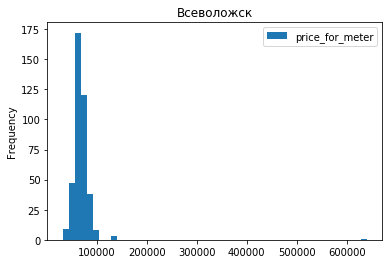

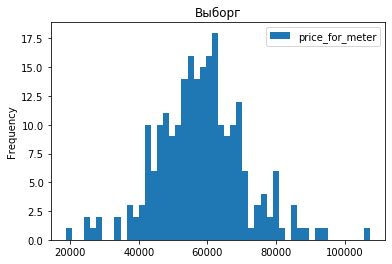

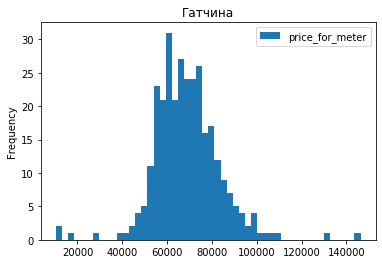

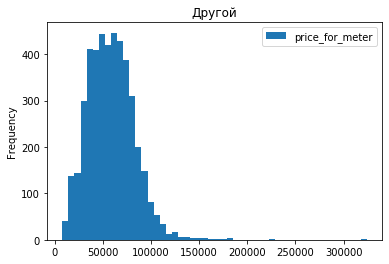

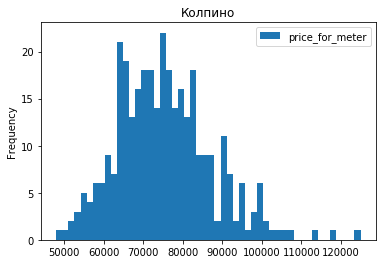

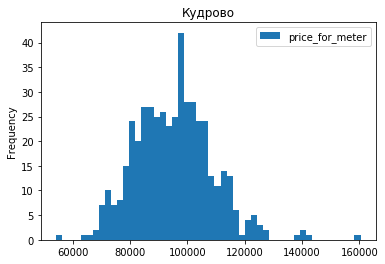

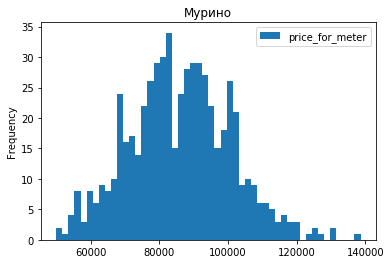

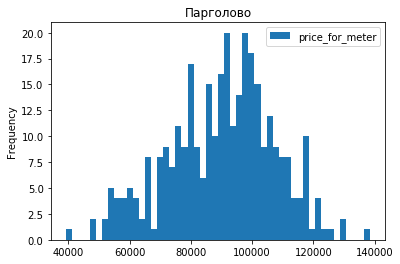

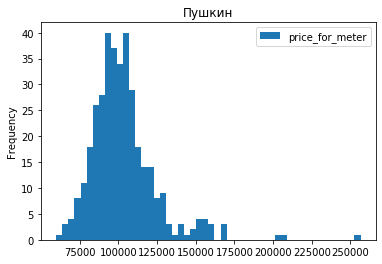

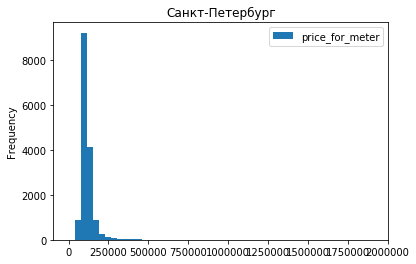

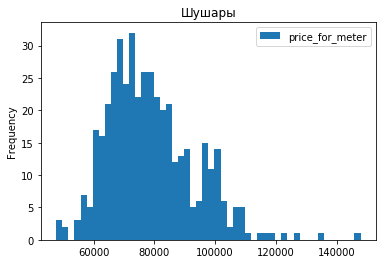

In [24]:
#создаем цикл и рисуем гистограммы цен за кв. метр на каждый из 10 населенных пунктов
for name, group_data in data.groupby('group_name'):
    group_data.plot(kind='hist', y='price_for_meter', bins=50, title=name)
    

In [25]:
#создаем таблицу со средним ценником за кв. метр и сортируем по убыванию, потому что по-моему, так гораздо очевиднее.
data_pivot_locality = data.pivot_table(index='group_name', values='price_for_meter')
print(data_pivot_locality.sort_values(by='price_for_meter', ascending=False))

                 price_for_meter
group_name                      
Санкт-Петербург    114849.008794
Пушкин             103125.819291
Кудрово             95324.930544
Парголово           90175.913458
Мурино              86087.512050
Шушары              78677.364217
Колпино             75424.579098
Гатчина             68746.146763
Всеволожск          68654.473986
Другой              58500.269465
Выборг              58141.909153


Итог: ожидаемо, самые дорогие "метры" в столице.

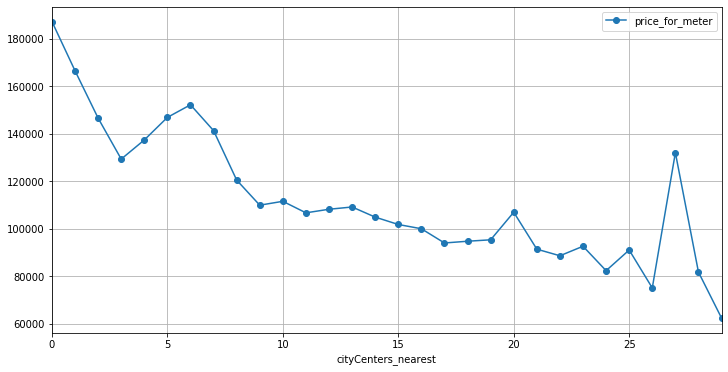

In [26]:
data_spb = data.query('locality_name =="Санкт-Петербург"')
data_spb['cityCenters_nearest'] = (0.001 * data_spb['cityCenters_nearest']).astype('int')

data_spb_pivot = data_spb.pivot_table(index='cityCenters_nearest', values='price_for_meter')
data_spb_pivot.plot(style='o-', grid=True, figsize=(12,6));


После 6 км от центра города график ползет вниз, будем считать, что радиус в 6 км можно обозначить центральной зоной.

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Все так, а как думаешь, с чем связан выброс на 27 км?
 
</div>

#### Выделим сегмент квартир в центре

In [27]:
#анализ территории по площади, цене, числу комнат и высоте потолков
data_spb_center = data_spb.query('cityCenters_nearest <=6')

In [28]:
#полезный вебинар посмотрела, рассчитаем кол-во корзин
def my_bins(data_spb_center,value): 
    if data_spb_center[value].max() > 100:
        return 50
    elif data_spb_center[value].max() > 500:
        return  100
    elif data_spb_center[value].max() > 1000:
        return  200
    else: return 20

In [29]:
#из того же вебинара функция для построения гистограмм, но попроще
def my_hist(data_spb_center, col):
    
    coef_bins = 0.005
    spb = data_spb_center.loc[(data_spb_center[col] >= data_spb_center[col].quantile(.05))&(data_spb_center[col] <= data_spb_center[col].quantile(.95)), col]

    plt.figure(figsize =(6, 2))
    hist = spb.plot(
                kind='hist', 
                bins=my_bins(data_spb_center, col), 
                alpha=0.5, 
                ec='black',
                color='orange',
                )
    plt.title('Распределение по столбцу ' + col)
    plt.grid()
    plt.show()

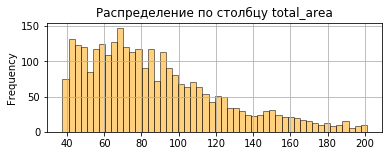

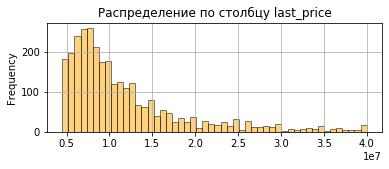

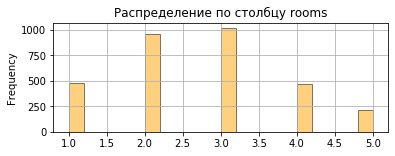

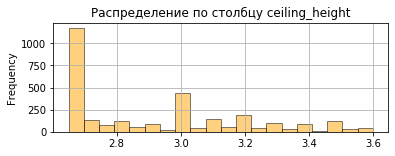

In [30]:
spb_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for i in spb_list:
    my_hist(data_spb_center, i) 

- Большое количество квартир площадью до 100 кв.м
- Большинство квартир 2 и 3 комнатные
- Потолки, по большей части, стандартные, со скачком в значение, равное 3 метрам.

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Супер, графики получились идеальные, даже придраться не к чему)
    
 
</div>

In [31]:
#выделим те факторы, которые влияют на стоимость квартиры
#довольно наглядно и удобно делать через pivot table
data_pivot_spb_rooms = data_spb_center.pivot_table(index='rooms', values='last_price', aggfunc=['max','median'])
print(data_pivot_spb_rooms)


               max      median
        last_price  last_price
rooms                         
0       71000000.0   5200000.0
1       43511000.0   6100000.0
2      289238400.0   7800000.0
3      330000000.0  10000000.0
4      159984000.0  12000000.0
5      401300000.0  14800000.0
6      245000000.0  19500000.0
7      763000000.0  24900000.0
8      180000000.0  21045000.0
9       88000000.0  29000000.0
10      40000000.0  27750000.0
11      33000000.0  25250000.0
14      28659000.0  28659000.0
15      65000000.0  65000000.0
16      28500000.0  28500000.0
19      32250000.0  32250000.0


In [32]:
data_pivot_spb_floor = data_spb_center.pivot_table(index='floor_category', values='last_price', aggfunc=['max','median'])
print(data_pivot_spb_floor)


                        max     median
                 last_price last_price
floor_category                        
другой          330000000.0  9750000.0
первый          135000000.0  6740000.0
последний       763000000.0  9386000.0


In [33]:
data_pivot_spb_center = data_spb_center.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc=['max','median'])

print(data_pivot_spb_center)

                             max      median
                      last_price  last_price
cityCenters_nearest                         
0                    160000000.0  11750000.0
1                    330000000.0  10835000.0
2                    401300000.0   9500000.0
3                    763000000.0   8500000.0
4                    155000000.0   9900000.0
5                    300000000.0   8920262.0
6                    245000000.0   8005000.0


In [34]:
data_spb_center.corr().style.background_gradient('coolwarm') #очень нравится матрица

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,month_expo,year_expo,living_to_total,kitchen_to_total
total_images,1,0.135332,0.0971703,0.0529365,0.071049,-0.0535573,0.0810643,-0.00723845,0.106376,-0.0250079,-0.0331111,0.136489,0.0250357,0.0109289,-0.0235419,0.0533641,-0.035797,-0.0156977,-0.00640262,-0.0273326,0.157024,-0.00931172,0.139857,-0.0164359,0.0226533
last_price,0.135332,1,0.607578,0.309873,0.0674689,0.0456794,0.537026,0.122465,0.0126853,-0.0222847,0.0025142,0.366182,0.077933,0.0915168,-0.0471057,0.104651,-0.0338036,0.090362,-0.0729351,0.0667717,0.794463,-0.0111481,-0.0398429,-0.00977929,-0.129451
total_area,0.0971703,0.607578,1,0.727687,0.122051,-0.0125309,0.948305,0.110854,0.0189057,-0.0521133,0.00435014,0.49493,0.0172787,0.0244942,-0.0809717,0.0987845,-0.0573641,-0.00213248,-0.0547636,0.144046,0.235522,-0.0242007,-0.0758055,0.139651,-0.373546
rooms,0.0529365,0.309873,0.727687,1,0.0911371,-0.174557,0.789583,-0.0309949,0.0198963,-0.114174,-0.0492058,0.252592,-0.0704222,-0.0760432,-0.162591,0.102116,-0.0845978,-0.0426924,-0.0402743,0.131176,-0.00983934,-0.0306447,-0.0595148,0.405906,-0.503681
ceiling_height,0.071049,0.0674689,0.122051,0.0911371,1,-0.135492,0.132488,-0.0682605,-0.0399318,0.0153978,0.000594855,0.068337,0.0326217,-0.0535026,-0.0990279,0.0521012,-0.0469441,0.0366239,-0.0290236,0.0379652,0.0392846,-0.0154605,0.03637,0.0642372,-0.0482686
floors_total,-0.0535573,0.0456794,-0.0125309,-0.174557,-0.135492,1,-0.100881,0.646766,-0.0269848,-0.00516787,0.00318218,0.0780322,0.356719,0.138161,0.329014,-0.244851,0.129379,-0.0429396,0.0507729,0.0121264,0.125107,0.0203985,-0.0404652,-0.32663,0.143564
living_area,0.0810643,0.537026,0.948305,0.789583,0.132488,-0.100881,1,0.0402935,0.024553,-0.0404184,0.00887234,0.367332,-0.0173932,-0.0117207,-0.118575,0.121267,-0.0799756,-0.00618322,-0.049205,0.141564,0.168223,-0.0190931,-0.0725389,0.39441,-0.473823
floor,-0.00723845,0.122465,0.110854,-0.0309949,-0.0682605,0.646766,0.0402935,1,-0.0201053,-0.0215194,-0.00890934,0.107573,0.281005,0.0752709,0.204891,-0.154672,0.0803162,-0.0506223,0.0259782,0.0267298,0.134954,0.0208942,-0.0341608,-0.189512,0.0268735
is_apartment,0.106376,0.0126853,0.0189057,0.0198963,-0.0399318,-0.0269848,0.024553,-0.0201053,1,-0.00767654,-0.0269402,0.0130648,-0.0860619,0.0171954,-0.0241703,0.0363043,-0.0280053,0.0098353,0.0183245,-0.0610267,0.021827,0.100813,0.209855,0.0102915,-0.00083347
studio,-0.0250079,-0.0222847,-0.0521133,-0.114174,0.0153978,-0.00516787,-0.0404184,-0.0215194,-0.00767654,1,-0.00257442,-0.0337729,0.0157308,0.00789272,0.00912198,-0.0399464,-0.00446487,0.00665397,0.0213033,-0.0323519,-0.00123176,0.0143814,0.00858095,0.0641598,0.0807737


In [35]:
data_spb_center.describe().style.format('{:.2f}')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,month_expo,year_expo,living_to_total,kitchen_to_total
count,3305.00,3305.00,3305.00,3305.00,3305.00,3305.00,3305.00,3305.00,3305.00,3305.00,3305.00,3305.00,3305.00,3305.00,3305.00,3305.00,3305.00,3305.00,3305.00,3305.00,3305.00,3305.00
mean,10.15,14967530.13,94.19,2.86,2.97,6.90,55.69,4.09,14.07,0.31,24556.96,3.85,1.05,464.27,1.30,476.60,261.94,144774.94,6.42,2017.17,0.58,0.17
std,5.98,24669218.29,60.21,1.47,0.76,3.64,38.72,2.82,8.89,0.75,3831.46,1.54,0.95,254.89,1.10,233.53,295.38,93875.51,3.47,1.13,0.11,0.09
min,0.00,1600000.00,12.00,0.00,2.40,2.00,2.00,1.00,2.00,0.00,15359.00,0.00,0.00,9.00,0.00,22.00,0.00,15345.27,1.00,2014.00,0.02,0.02
25%,6.00,6700000.00,57.70,2.00,2.65,5.00,31.90,2.00,9.10,0.00,21869.00,3.00,0.00,363.00,0.00,315.00,60.00,99437.15,3.00,2017.00,0.52,0.11
50%,10.00,9300000.00,80.00,3.00,2.84,6.00,47.00,4.00,11.30,0.00,24202.00,4.00,1.00,455.00,1.00,502.00,145.00,123529.41,6.00,2017.00,0.58,0.15
75%,15.00,14500000.00,110.60,4.00,3.17,8.00,67.40,5.00,16.00,0.00,26591.00,5.00,2.00,513.00,2.00,582.00,369.00,155976.68,10.00,2018.00,0.66,0.20
max,50.00,763000000.00,631.20,19.00,32.00,25.00,409.00,25.00,107.00,5.00,39465.00,6.00,3.00,2295.00,3.00,1293.00,1606.00,1907500.00,12.00,2019.00,0.98,0.76


- Цена, безусловно, повышается по мере роста количества комнат, но основным критерием даже в центре остается общая площадь. **Как и в других районах.**
- Первый этаж значительно проигрывает в цене, **как и в других районах.**
- Удаленность от центра в данном случае низкя, мы ведь выбрали центральный район города, потому и разброс цен невеликий.
- Средняя цена в центре выше в 2 раза.
- В центре большее количество 2-3х комнатных квартир, а не однокомнатных и студий.
- Средняя площадь больше в 1,5 раза, чем по всему массиву данных.

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Основное отличие центрального района от спального, конечно же, в цене. А особенностью Санкт-Петербургских квартир является наличие высоких потолков и нетипичной застройкой исторического центра.
</div>

### Шаг 5. Общий вывод

- Больше всего продают двухкомнатные квартиры, в центре сдвиг ближе к 3 комнатам, на окраине - 1 комнате.
- Средняя площадь квартир - 60 кв.м, в центре Спб - 90 кв. м
- Обычно, продажа квартиры занимает около 3х месяцев.
- Цена квартиры зависит от ее площади и отдаленности от центра/города: самые дорогие квартиры в Санкт-Петербурге, особенно в центре города - в радиусе 6 км.
- Цена также коррелирует с этажом - самый "дешевый" - первый.

*честно говоря, после проделанных операций, мало, что остается в голове, с данными еще работать и работать для более однозначных выводов*

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>

Поздравляю с успешным проектом!

- Ты хорошо делаешь выводы и анализируешь результаты.
    
- Код написан аккуратно и качественно, видно, что есть какой-то определенный бэкграунд.

- Соблюдена структура проекта, было приятно проверять:)
    
- Все написано четко и по делу

 


Желаю дальнейших успехов!


</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод